In [1]:
# COMP 5300 Final Project
# Musculoskeletal Abnormality Detection
# Michelle, Jennifer, Amelia, Deva

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.image as mpimg
%matplotlib inline
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

2024-04-18 19:42:22.654800: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-18 19:42:23.760270: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# Display file directory tree
def print_file_directory(path):
    for root, dirs, files in os.walk(path):
        level = root.replace(path, '').count(os.sep)
        indent = ' ' * 3 * level
        subindent = ' ' * 3 * (level + 1)
        print('{}{}/'.format(indent, os.path.basename(root)))
        for f in files:
            print('{}{}'.format(subindent, f))

In [4]:
print_file_directory('MURA-v1.1')

MURA-v1.1/
   train_labeled_studies.csv
   train_image_paths.csv
   valid_image_paths.csv
   valid_labeled_studies.csv
   train/
      XR_FOREARM/
         patient09232/
            study1_positive/
               image2.png
               image1.png
         patient09202/
            study1_positive/
               image2.png
               image1.png
         patient09396/
            study1_negative/
               image2.png
               image1.png
         patient09567/
            study1_negative/
               image2.png
               image1.png
         patient09515/
            study1_negative/
               image2.png
               image1.png
         patient09139/
            study1_positive/
               image2.png
               image1.png
         patient09235/
            study1_positive/
               image2.png
               image1.png
         patient09663/
            study1_negative/
               image2.png
               image3.png
               image1

            study1_negative/
               image2.png
               image1.png
            study2_negative/
               image2.png
               image1.png
         patient09188/
            study1_positive/
               image2.png
               image1.png
         patient08669/
            study1_negative/
               image2.png
               image1.png
         patient09664/
            study1_negative/
               image2.png
               image1.png
         patient09623/
            study1_negative/
               image1.png
         patient09455/
            study1_negative/
               image2.png
               image1.png
         patient01401/
            study1_negative/
               image2.png
               image1.png
         patient09491/
            study1_negative/
               image2.png
               image1.png
         patient05781/
            study1_negative/
               image2.png
               image1.png
         patient09475/
         

            study1_negative/
               image2.png
               image1.png
         patient10149/
            study1_negative/
               image2.png
               image3.png
               image1.png
         patient10939/
            study1_negative/
               image2.png
               image3.png
               image1.png
         patient11184/
            study1_negative/
               image2.png
               image3.png
               image1.png
         patient09809/
            study1_positive/
               image2.png
               image3.png
               image1.png
               image4.png
         patient11027/
            study1_negative/
               image2.png
               image3.png
               image1.png
         patient09080/
            study1_negative/
               image2.png
               image3.png
               image1.png
         patient09950/
            study1_positive/
               image2.png
               image3.png
         

         patient09746/
            study1_positive/
               image2.png
               image1.png
         patient10785/
            study1_negative/
               image2.png
               image3.png
               image1.png
         patient05756/
            study1_negative/
               image2.png
               image3.png
               image1.png
            study2_negative/
               image2.png
               image3.png
               image1.png
         patient01921/
            study1_negative/
               image2.png
               image3.png
               image1.png
         patient06451/
            study1_positive/
               image2.png
               image1.png
         patient09892/
            study1_positive/
               image2.png
               image3.png
               image1.png
         patient10565/
            study1_negative/
               image2.png
               image1.png
         patient11136/
            study1_negative/
         

            study1_negative/
               image2.png
               image3.png
               image1.png
         patient10360/
            study1_negative/
               image2.png
               image1.png
         patient09913/
            study1_positive/
               image2.png
               image3.png
               image1.png
         patient10142/
            study1_negative/
               image2.png
               image3.png
               image1.png
         patient09958/
            study1_positive/
               image2.png
               image3.png
               image1.png
         patient11019/
            study1_negative/
               image2.png
               image3.png
               image1.png
         patient09752/
            study1_positive/
               image2.png
               image3.png
               image1.png
         patient10870/
            study1_negative/
               image2.png
               image3.png
               image1.png
         

            study1_negative/
               image2.png
               image1.png
         patient05397/
            study1_negative/
               image2.png
               image3.png
               image1.png
         patient09810/
            study1_positive/
               image2.png
               image3.png
               image1.png
         patient11020/
            study1_negative/
               image2.png
               image3.png
               image1.png
         patient09779/
            study1_positive/
               image2.png
               image1.png
         patient10321/
            study1_negative/
               image2.png
               image3.png
               image1.png
         patient10244/
            study1_negative/
               image2.png
               image1.png
         patient05903/
            study1_positive/
               image2.png
               image3.png
               image1.png
               image4.png
         patient10543/
            

            study1_negative/
               image2.png
               image3.png
               image1.png
         patient03276/
            study1_positive/
               image2.png
               image3.png
               image1.png
               image4.png
         patient04645/
            study1_negative/
               image1.png
         patient03820/
            study1_negative/
               image2.png
               image3.png
               image1.png
         patient03627/
            study1_positive/
               image2.png
               image3.png
               image1.png
         patient03483/
            study1_positive/
               image2.png
               image3.png
               image1.png
         patient04216/
            study1_negative/
               image2.png
               image3.png
               image1.png
         patient03378/
            study1_positive/
               image2.png
               image3.png
               image1.png
         

            study1_negative/
               image2.png
               image3.png
               image1.png
         patient03902/
            study1_negative/
               image1.png
         patient03888/
            study1_negative/
               image1.png
         patient04417/
            study1_negative/
               image2.png
               image3.png
               image1.png
         patient04648/
            study1_negative/
               image2.png
               image3.png
               image1.png
         patient04135/
            study1_negative/
               image1.png
         patient04858/
            study1_negative/
               image1.png
         patient03272/
            study1_positive/
               image2.png
               image3.png
               image1.png
         patient03513/
            study1_positive/
               image2.png
               image3.png
               image1.png
         patient04380/
            study1_negative/
         

            study1_positive/
               image2.png
               image3.png
               image1.png
         patient03368/
            study1_positive/
               image2.png
               image3.png
               image1.png
         patient03600/
            study1_positive/
               image2.png
               image3.png
               image1.png
         patient04699/
            study1_negative/
               image2.png
               image1.png
         patient03642/
            study1_positive/
               image2.png
               image3.png
               image1.png
         patient03557/
            study1_positive/
               image2.png
               image3.png
               image1.png
         patient04037/
            study1_negative/
               image1.png
         patient04769/
            study1_negative/
               image1.png
         patient04079/
            study1_negative/
               image2.png
               image3.png
         

            study1_positive/
               image2.png
               image1.png
         patient00205/
            study1_positive/
               image2.png
               image3.png
               image1.png
               image4.png
         patient02500/
            study1_negative/
               image1.png
         patient00863/
            study1_positive/
               image2.png
               image3.png
               image1.png
         patient01068/
            study1_positive/
               image2.png
               image3.png
               image1.png
               image4.png
         patient00792/
            study1_positive/
               image2.png
               image1.png
         patient01826/
            study1_negative/
               image2.png
               image3.png
               image1.png
               image4.png
         patient02625/
            study1_negative/
               image2.png
               image3.png
               image1.png
         

         patient01239/
            study1_positive/
               image1.png
         patient01770/
            study1_negative/
               image2.png
               image3.png
               image1.png
         patient02580/
            study1_negative/
               image2.png
               image3.png
               image1.png
         patient02229/
            study1_negative/
               image5.png
               image2.png
               image3.png
               image1.png
               image6.png
               image4.png
         patient02286/
            study1_negative/
               image2.png
               image3.png
               image1.png
         patient02055/
            study1_negative/
               image2.png
               image3.png
               image1.png
               image4.png
         patient00971/
            study1_positive/
               image2.png
               image3.png
               image1.png
         patient01975/
            stu

            study1_positive/
               image2.png
               image3.png
               image1.png
               image4.png
         patient00419/
            study1_positive/
               image2.png
               image1.png
         patient02148/
            study1_negative/
               image2.png
               image3.png
               image1.png
               image4.png
         patient00047/
            study1_positive/
               image1.png
         patient00301/
            study1_positive/
               image2.png
               image1.png
         patient01910/
            study1_negative/
               image2.png
               image3.png
               image1.png
         patient00362/
            study1_positive/
               image2.png
               image3.png
               image1.png
         patient02142/
            study1_negative/
               image2.png
               image1.png
         patient01071/
            study1_positive/
         

            study1_positive/
               image2.png
               image3.png
               image1.png
               image4.png
         patient00441/
            study1_positive/
               image2.png
               image3.png
               image1.png
         patient00071/
            study1_positive/
               image1.png
         patient02381/
            study1_negative/
               image1.png
         patient01588/
            study1_negative/
               image2.png
               image3.png
               image1.png
               image4.png
         patient02662/
            study1_negative/
               image2.png
               image3.png
               image1.png
         patient00610/
            study1_positive/
               image1.png
         patient01104/
            study1_positive/
               image2.png
               image3.png
               image1.png
         patient01277/
            study1_positive/
               image2.png
         

         patient00919/
            study1_positive/
               image2.png
               image3.png
               image1.png
               image4.png
         patient00284/
            study1_positive/
               image2.png
               image3.png
               image1.png
               image4.png
         patient01971/
            study1_negative/
               image2.png
               image3.png
               image1.png
               image4.png
         patient01325/
            study1_positive/
               image2.png
               image3.png
               image1.png
               image4.png
         patient02460/
            study1_negative/
               image2.png
               image1.png
         patient01043/
            study1_positive/
               image1.png
         patient01521/
            study1_negative/
               image1.png
         patient02163/
            study1_negative/
               image2.png
               image3.png
            

         patient07482/
            study1_negative/
               image2.png
               image1.png
         patient07195/
            study1_positive/
               image2.png
               image3.png
               image1.png
         patient06749/
            study1_positive/
               image2.png
               image3.png
               image1.png
         patient07272/
            study1_positive/
               image2.png
               image3.png
               image1.png
               image4.png
         patient02585/
            study1_negative/
               image2.png
               image3.png
               image1.png
         patient01424/
            study1_negative/
               image1.png
         patient06915/
            study1_positive/
               image2.png
               image3.png
               image1.png
               image4.png
         patient07923/
            study1_negative/
               image2.png
               image3.png
            

         patient09025/
            study1_negative/
               image2.png
               image3.png
               image1.png
               image4.png
         patient08288/
            study1_negative/
               image2.png
               image3.png
               image1.png
         patient08990/
            study1_negative/
               image2.png
               image3.png
               image1.png
         patient06359/
            study1_positive/
               image2.png
               image1.png
         patient07634/
            study1_negative/
               image2.png
               image1.png
         patient00116/
            study1_negative/
               image2.png
               image3.png
               image1.png
         patient08286/
            study1_negative/
               image2.png
               image1.png
         patient08979/
            study1_negative/
               image2.png
               image3.png
               image1.png
         pat

            study1_positive/
               image2.png
               image3.png
               image1.png
         patient07901/
            study1_negative/
               image1.png
         patient08159/
            study1_negative/
               image2.png
               image3.png
               image1.png
         patient08293/
            study1_negative/
               image2.png
               image3.png
               image1.png
         patient07688/
            study1_negative/
               image2.png
               image1.png
         patient08953/
            study1_negative/
               image2.png
               image3.png
               image1.png
               image4.png
         patient05402/
            study1_negative/
               image2.png
               image3.png
               image1.png
         patient06795/
            study1_positive/
               image2.png
               image3.png
               image1.png
         patient06614/
            

            study1_negative/
               image2.png
               image1.png
            study2_negative/
               image2.png
               image3.png
               image1.png
         patient07084/
            study1_positive/
               image2.png
               image3.png
               image1.png
         patient07642/
            study1_negative/
               image1.png
         patient06938/
            study1_positive/
               image2.png
               image3.png
               image1.png
         patient07010/
            study1_positive/
               image2.png
               image3.png
               image1.png
         patient02375/
            study1_negative/
               image2.png
               image3.png
               image1.png
         patient08379/
            study1_negative/
               image2.png
               image3.png
               image1.png
               image4.png
         patient08373/
            study1_negative/
      

            study1_negative/
               image2.png
               image1.png
         patient07996/
            study1_negative/
               image2.png
               image3.png
               image1.png
         patient08409/
            study1_negative/
               image2.png
               image3.png
               image1.png
         patient07002/
            study1_positive/
               image2.png
               image3.png
               image1.png
         patient07970/
            study1_negative/
               image2.png
               image1.png
         patient07819/
            study1_negative/
               image2.png
               image1.png
         patient07177/
            study1_positive/
               image2.png
               image3.png
               image1.png
            study2_negative/
               image1.png
         patient08232/
            study1_negative/
               image2.png
               image3.png
               image1.png
      

         patient07891/
            study1_negative/
               image2.png
               image3.png
               image1.png
         patient07108/
            study1_positive/
               image2.png
               image3.png
               image1.png
         patient06484/
            study1_positive/
               image2.png
               image3.png
               image1.png
         patient06545/
            study1_positive/
               image2.png
               image3.png
               image1.png
            study2_positive/
               image2.png
               image1.png
         patient06843/
            study1_positive/
               image1.png
         patient09017/
            study1_negative/
               image2.png
               image3.png
               image1.png
         patient08509/
            study1_negative/
               image2.png
               image3.png
               image1.png
         patient09036/
            study1_negative/
         

         patient03061/
            study1_negative/
               image2.png
               image1.png
         patient02894/
            study1_positive/
               image2.png
               image3.png
               image1.png
               image4.png
         patient03145/
            study1_negative/
               image2.png
               image1.png
         patient01941/
            study1_negative/
               image2.png
               image3.png
               image1.png
               image4.png
         patient03098/
            study1_negative/
               image2.png
               image1.png
         patient03006/
            study1_negative/
               image2.png
               image1.png
         patient02764/
            study1_positive/
               image2.png
               image1.png
         patient02936/
            study1_positive/
               image2.png
               image1.png
         patient03170/
            study1_negative/
            

         patient05472/
            study1_negative/
               image2.png
               image3.png
               image1.png
         patient05476/
            study1_negative/
               image2.png
               image1.png
         patient05653/
            study1_negative/
               image2.png
               image3.png
               image1.png
            study2_negative/
               image2.png
               image3.png
               image1.png
         patient05290/
            study1_positive/
               image2.png
               image1.png
         patient05521/
            study1_negative/
               image2.png
               image1.png
         patient05250/
            study1_positive/
               image2.png
               image3.png
               image1.png
               image4.png
         patient04940/
            study1_positive/
               image2.png
               image3.png
               image1.png
         patient03799/
            

         patient05344/
            study1_positive/
               image2.png
               image1.png
         patient04942/
            study1_positive/
               image2.png
               image3.png
               image1.png
         patient06045/
            study1_negative/
               image2.png
               image3.png
               image1.png
         patient02932/
            study1_positive/
               image5.png
               image2.png
               image7.png
               image3.png
               image1.png
               image6.png
               image4.png
            study2_negative/
               image2.png
               image1.png
         patient06062/
            study1_negative/
               image2.png
               image1.png
         patient05943/
            study1_negative/
               image2.png
               image3.png
               image1.png
         patient06308/
            study1_negative/
               image2.png
         

            study1_negative/
               image2.png
               image3.png
               image1.png
         patient05971/
            study1_negative/
               image2.png
               image3.png
               image1.png
         patient03077/
            study1_positive/
               image5.png
               image2.png
               image3.png
               image1.png
               image4.png
         patient05606/
            study1_negative/
               image2.png
               image1.png
         patient05605/
            study1_negative/
               image2.png
               image3.png
               image1.png
               image4.png
         patient03395/
            study1_negative/
               image2.png
               image1.png
         patient05441/
            study1_positive/
               image2.png
               image3.png
               image1.png
               image4.png
         patient05560/
            study1_negative/
         

            study1_positive/
               image1.png
            study2_negative/
               image2.png
               image3.png
               image1.png
         patient11292/
            study1_positive/
               image2.png
               image3.png
               image1.png
            study2_negative/
               image2.png
               image3.png
               image1.png
               image4.png
         patient11729/
            study1_positive/
               image5.png
               image2.png
               image3.png
               image1.png
               image4.png
         patient11711/
            study1_positive/
               image2.png
               image1.png
            study2_negative/
               image2.png
               image3.png
               image1.png
               image4.png
         patient11794/
            study1_negative/
               image2.png
               image3.png
               image1.png
               image4.png


In [5]:
# Remove .DS_Store if needed
# ! find . -name '.DS_Store' -type f -delete

In [6]:
# Images stored and separated in folders by upper extremity study type
os.listdir('MURA-v1.1/train')

['XR_FOREARM',
 'XR_HAND',
 'XR_FINGER',
 'XR_SHOULDER',
 'XR_WRIST',
 'XR_HUMERUS',
 'XR_ELBOW']

In [7]:
os.listdir('MURA-v1.1/valid')

['XR_FOREARM',
 'XR_HAND',
 'XR_FINGER',
 'XR_SHOULDER',
 'XR_WRIST',
 'XR_HUMERUS',
 'XR_ELBOW']

In [8]:
# Restructure and consolidate data with image paths and labels
# Example path: MURA-v1.1/train/XR_HAND/patient05509/study1_negative/image1.png

def restructure_dataset(path):
    data = []
    
    for study_type in os.listdir(path):
        # Get study type path to access patient folders
        study_type_path = path + '/' + str(study_type)

        for patient_id in os.listdir(study_type_path):
            # Get patient id path to access study folders
            study_id = study_type_path + '/' + str(patient_id)
            for label in os.listdir(study_id):
                # Get abnormality label as positive (1) or negative (0)
                if label.split('_')[-1] == 'positive': 
                    num_label = 1
                elif label.split('_')[-1] == 'negative':
                    num_label = 0

                # Get study id and label path to access image folders
                label_path = study_id + '/' + str(label)
                for img in os.listdir(label_path):
                    img_path = label_path + '/' + str(img)

                    # Add data to array
                    data.append(
                        {
                            'study_type': study_type,
                            'patient_id': patient_id,
                            'img_path': img_path,
                            'label': num_label,
                        }
                    )
    return data

In [9]:
# Consolidate all training data into single dataframe 
df_train = pd.DataFrame(restructure_dataset('MURA-v1.1/train'))
df_train.head()

study_type    patient_id  \
0  XR_FOREARM  patient09232   
1  XR_FOREARM  patient09232   
2  XR_FOREARM  patient09202   
3  XR_FOREARM  patient09202   
4  XR_FOREARM  patient09396   

                                            img_path  label  
0  MURA-v1.1/train/XR_FOREARM/patient09232/study1...      1  
1  MURA-v1.1/train/XR_FOREARM/patient09232/study1...      1  
2  MURA-v1.1/train/XR_FOREARM/patient09202/study1...      1  
3  MURA-v1.1/train/XR_FOREARM/patient09202/study1...      1  
4  MURA-v1.1/train/XR_FOREARM/patient09396/study1...      0

In [10]:
df_train.shape

(36812, 4)

In [11]:
df_train.isnull().sum()

study_type    0
patient_id    0
img_path      0
label         0
dtype: int64

In [12]:
# Preprocessing & stratified sampling to get validation dataset

df_train['combined_study_type_label'] = df_train['study_type'] + '_' + df_train['label'].astype(str)

df_train, df_valid = train_test_split(df_train, test_size = 0.1, stratify = df_train['combined_study_type_label'])

df_train = df_train.drop(columns=['combined_study_type_label'])
df_valid = df_valid.drop(columns=['combined_study_type_label'])

In [13]:
df_train.head()

study_type    patient_id  \
9448     XR_FINGER  patient04061   
20538  XR_SHOULDER  patient00644   
6544       XR_HAND  patient08993   
10429    XR_FINGER  patient04416   
23233     XR_WRIST  patient08734   

                                                img_path  label  
9448   MURA-v1.1/train/XR_FINGER/patient04061/study1_...      0  
20538  MURA-v1.1/train/XR_SHOULDER/patient00644/study...      1  
6544   MURA-v1.1/train/XR_HAND/patient08993/study1_ne...      0  
10429  MURA-v1.1/train/XR_FINGER/patient04416/study1_...      0  
23233  MURA-v1.1/train/XR_WRIST/patient08734/study1_n...      0

In [14]:
df_train.shape

(33130, 4)

In [15]:
df_valid.head()

study_type    patient_id  \
15901  XR_SHOULDER  patient00697   
13258  XR_SHOULDER  patient01459   
25445     XR_WRIST  patient07232   
27724     XR_WRIST  patient00972   
24211     XR_WRIST  patient07698   

                                                img_path  label  
15901  MURA-v1.1/train/XR_SHOULDER/patient00697/study...      1  
13258  MURA-v1.1/train/XR_SHOULDER/patient01459/study...      0  
25445  MURA-v1.1/train/XR_WRIST/patient07232/study1_p...      1  
27724  MURA-v1.1/train/XR_WRIST/patient00972/study1_n...      0  
24211  MURA-v1.1/train/XR_WRIST/patient07698/study1_n...      0

In [16]:
df_valid.shape

(3682, 4)

In [17]:
# Consolidate all test data into single dataframe
df_test = pd.DataFrame(restructure_dataset('MURA-v1.1/valid'))
df_test.head()

study_type    patient_id  \
0  XR_FOREARM  patient11463   
1  XR_FOREARM  patient11463   
2  XR_FOREARM  patient11449   
3  XR_FOREARM  patient11449   
4  XR_FOREARM  patient11408   

                                            img_path  label  
0  MURA-v1.1/valid/XR_FOREARM/patient11463/study1...      0  
1  MURA-v1.1/valid/XR_FOREARM/patient11463/study1...      0  
2  MURA-v1.1/valid/XR_FOREARM/patient11449/study1...      0  
3  MURA-v1.1/valid/XR_FOREARM/patient11449/study1...      0  
4  MURA-v1.1/valid/XR_FOREARM/patient11408/study1...      1

In [18]:
df_test.shape

(3197, 4)

In [19]:
df_test.isnull().sum()

study_type    0
patient_id    0
img_path      0
label         0
dtype: int64

In [20]:
# Find problematic images and remove them from the dataset (amelia)
# https://stackoverflow.com/questions/71572762/cannot-identify-image-file-io-bytesio-object-at-0x000001e6cf13a108
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

all_image_paths = []
all_image_paths.extend(df_train['img_path'])
all_image_paths.extend(df_valid['img_path'])
all_image_paths.extend(df_test['img_path'])

problem_paths = []

for img_p in all_image_paths:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
        print(img_p)
        problem_paths.append(img_p)

for prob_path in problem_paths:
    df_train.drop(df_train.loc[df_train['img_path']==prob_path].index, inplace=True)
    df_valid.drop(df_valid.loc[df_valid['img_path']==prob_path].index, inplace=True)
    df_test.drop(df_test.loc[df_test['img_path']==prob_path].index, inplace=True)

MURA-v1.1/train/XR_WRIST/patient07840/study2_negative/._image1.png
MURA-v1.1/train/XR_WRIST/patient07840/study2_negative/._image3.png
MURA-v1.1/train/XR_WRIST/patient07840/study1_negative/._image1.png
MURA-v1.1/train/XR_WRIST/patient07840/study2_negative/._image2.png


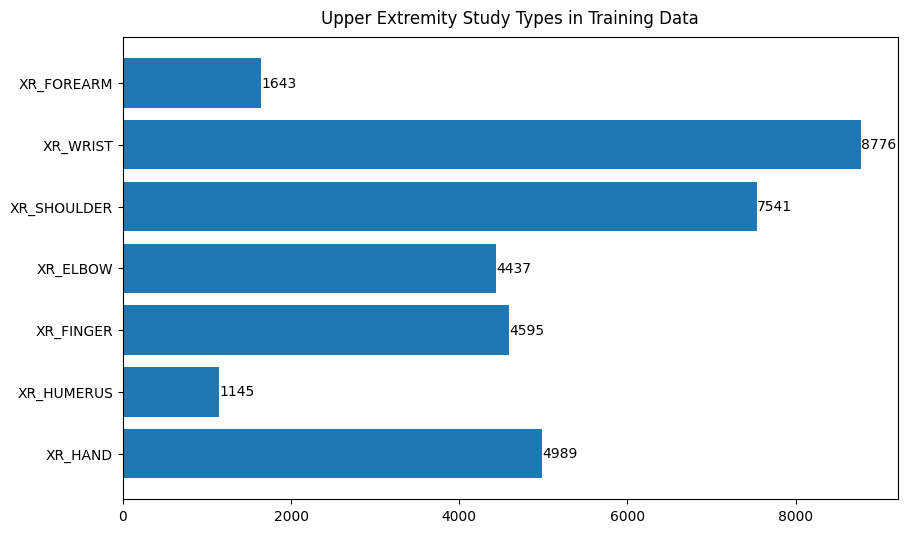

In [21]:
# Exploratory analysis
study_types = ['XR_HAND', 'XR_HUMERUS', 'XR_FINGER', 'XR_ELBOW', 'XR_SHOULDER', 'XR_WRIST', 'XR_FOREARM']

def print_type_values(df, title):
    study_counts = {}
    for study_type in study_types:
        study_counts[study_type] = (df.study_type == study_type).sum()
        
    fig, ax = plt.subplots(figsize = (10, 6))
    bars = ax.barh(list(study_counts.keys()), list(study_counts.values()))
    ax.bar_label(bars)
    plt.title(title, pad = 10)
    plt.show()

print_type_values(df_train, "Upper Extremity Study Types in Training Data")

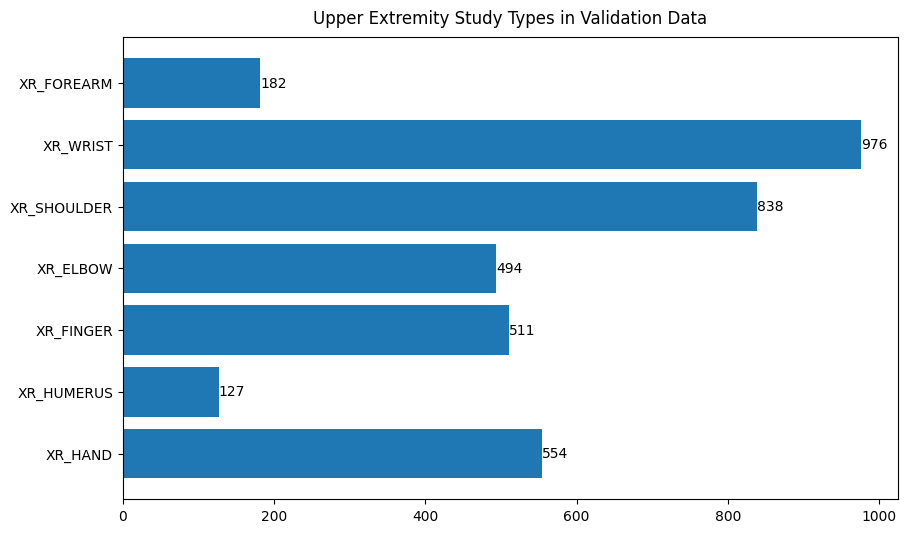

In [22]:
print_type_values(df_valid, "Upper Extremity Study Types in Validation Data")

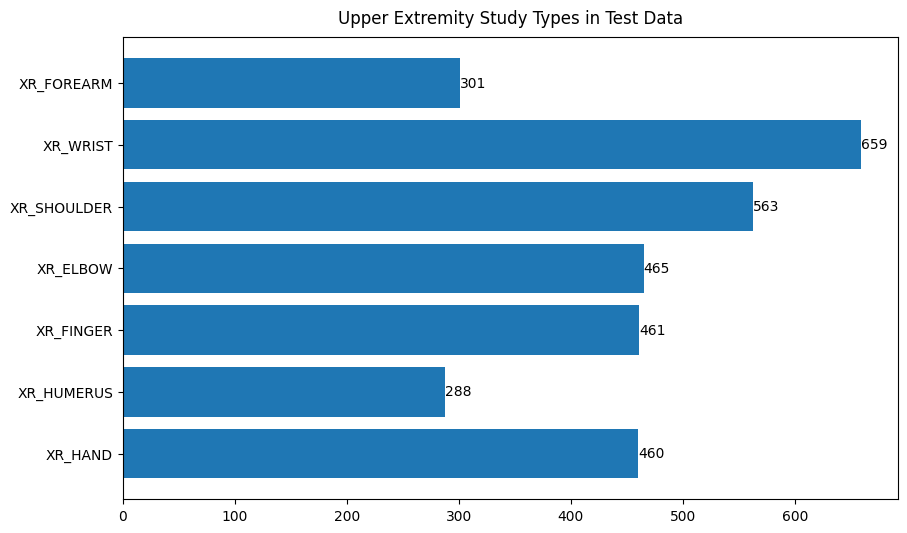

In [23]:
print_type_values(df_test, "Upper Extremity Study Types in Test Data")

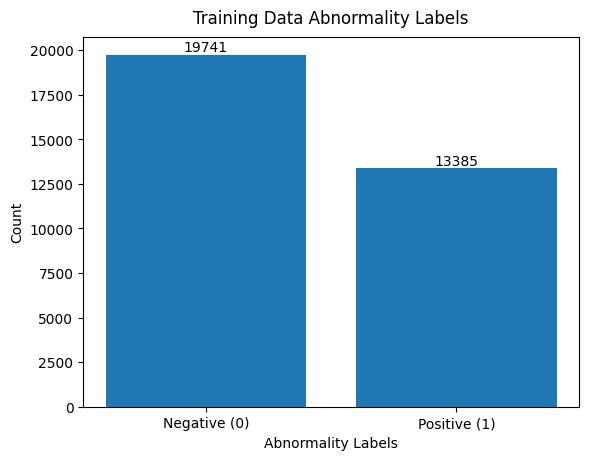

In [24]:
def print_labels(df, title):
    
    value_counts = df['label'].value_counts()
    
    bars = plt.bar(value_counts.index, value_counts.values)
    plt.xlabel('Abnormality Labels')
    plt.ylabel('Count')
    plt.title(title, pad = 10)
    plt.xticks(value_counts.index, ['Negative (0)', 'Positive (1)'])
    for bar, count in zip(bars, value_counts.values):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), ha = 'center', va = 'bottom')
    
    plt.show()

print_labels(df_train, "Training Data Abnormality Labels")

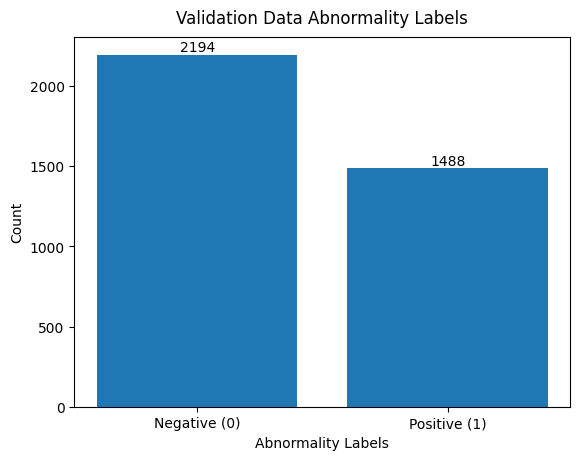

In [25]:
print_labels(df_valid, "Validation Data Abnormality Labels")

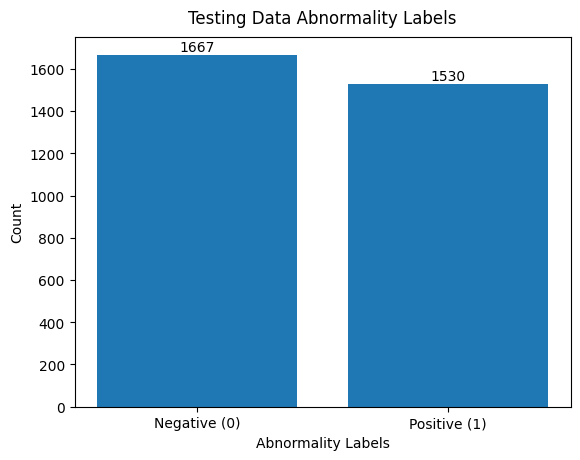

In [26]:
print_labels(df_test, "Testing Data Abnormality Labels")

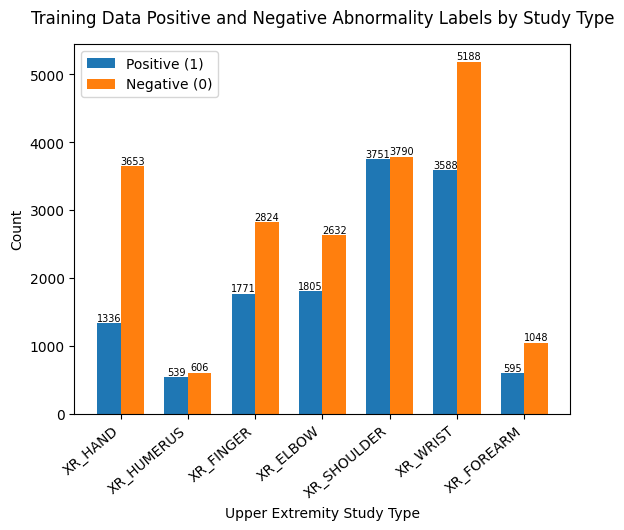

In [27]:
def print_labels_by_study_type(df, title):
    study_type_counts = []
    for study_type in study_types:
        positive_count = ((df.study_type == study_type) & (df.label == 1)).sum()
        negative_count = ((df.study_type == study_type) & (df.label == 0)).sum()
        study_type_counts.append((positive_count, negative_count))

    x = np.arange(len(study_types))
    width = 0.35
    
    fig, ax = plt.subplots()

    # Plot values
    positive_bars = ax.bar(x - width / 2, [count[0] for count in study_type_counts], width, label = 'Positive (1)')
    negative_bars = ax.bar(x + width / 2, [count[1] for count in study_type_counts], width, label = 'Negative (0)')
    ax.set_xlabel('Upper Extremity Study Type')
    ax.set_ylabel('Count')
    ax.set_title(title, pad = 15)
    ax.set_xticks(x)
    ax.set_xticklabels(study_types, rotation = 40, ha = 'right')
    ax.legend()
    
    for bar in positive_bars + negative_bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height, '%d' % int(height), ha = 'center', va = 'bottom', fontsize = 7)
    
    plt.show()

print_labels_by_study_type(df_train, "Training Data Positive and Negative Abnormality Labels by Study Type")

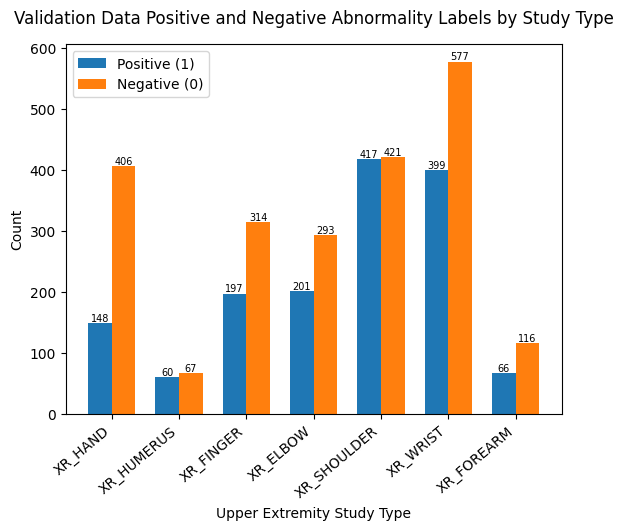

In [28]:
print_labels_by_study_type(df_valid, "Validation Data Positive and Negative Abnormality Labels by Study Type")

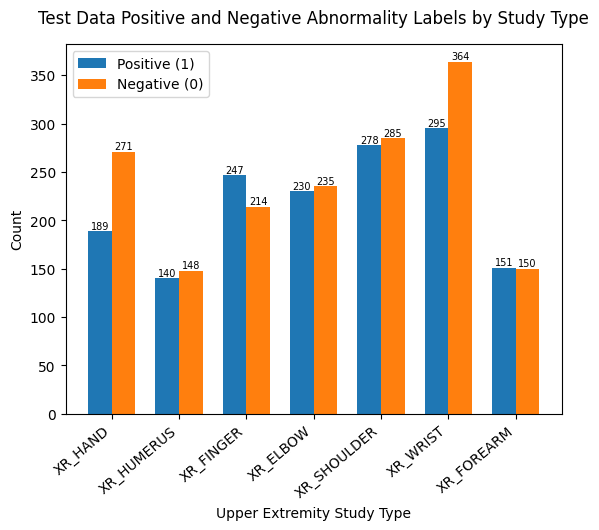

In [29]:
print_labels_by_study_type(df_test, "Test Data Positive and Negative Abnormality Labels by Study Type")

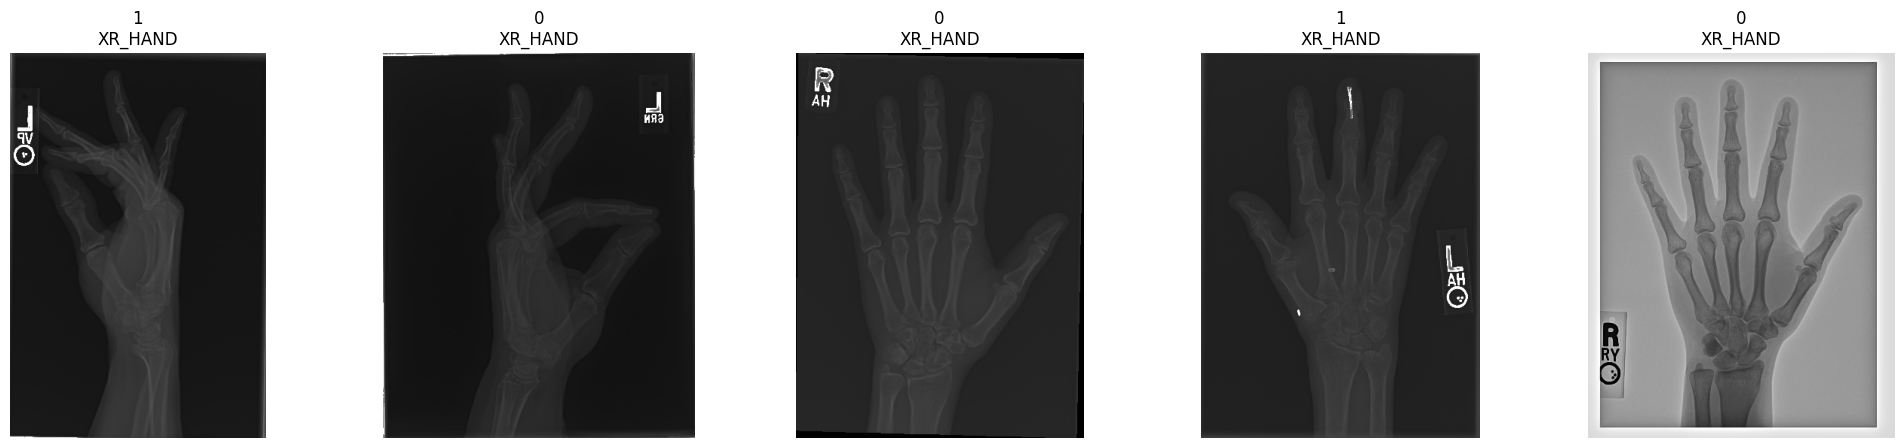

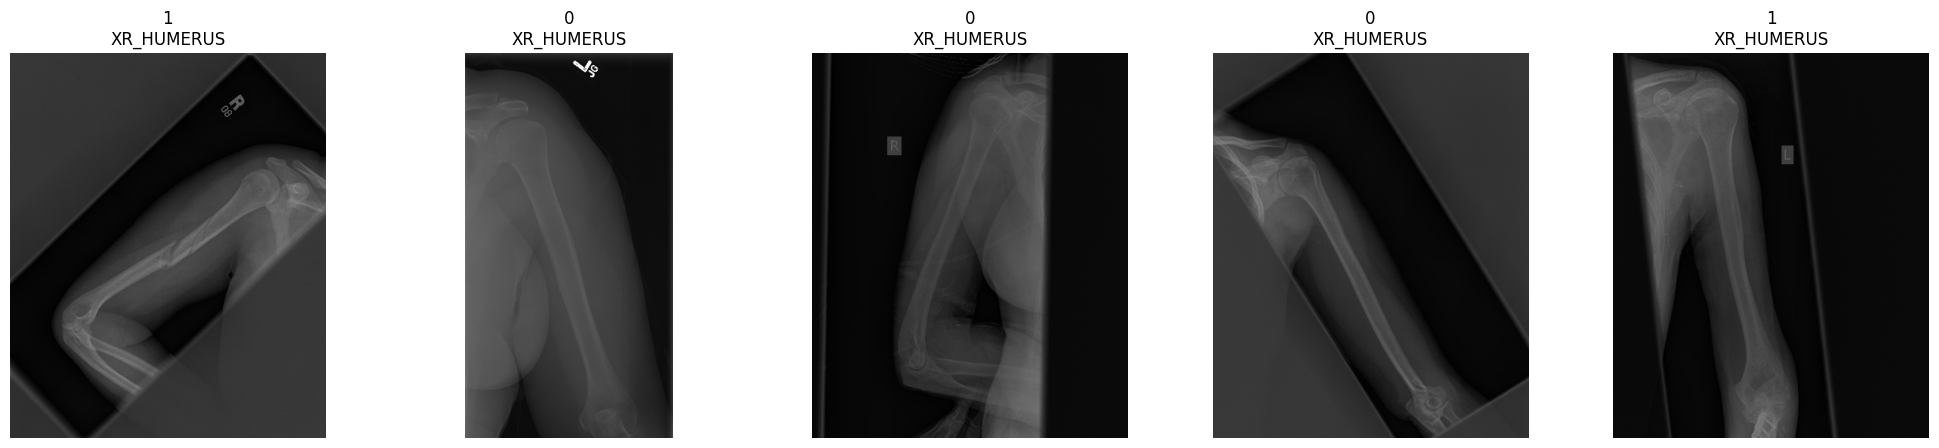

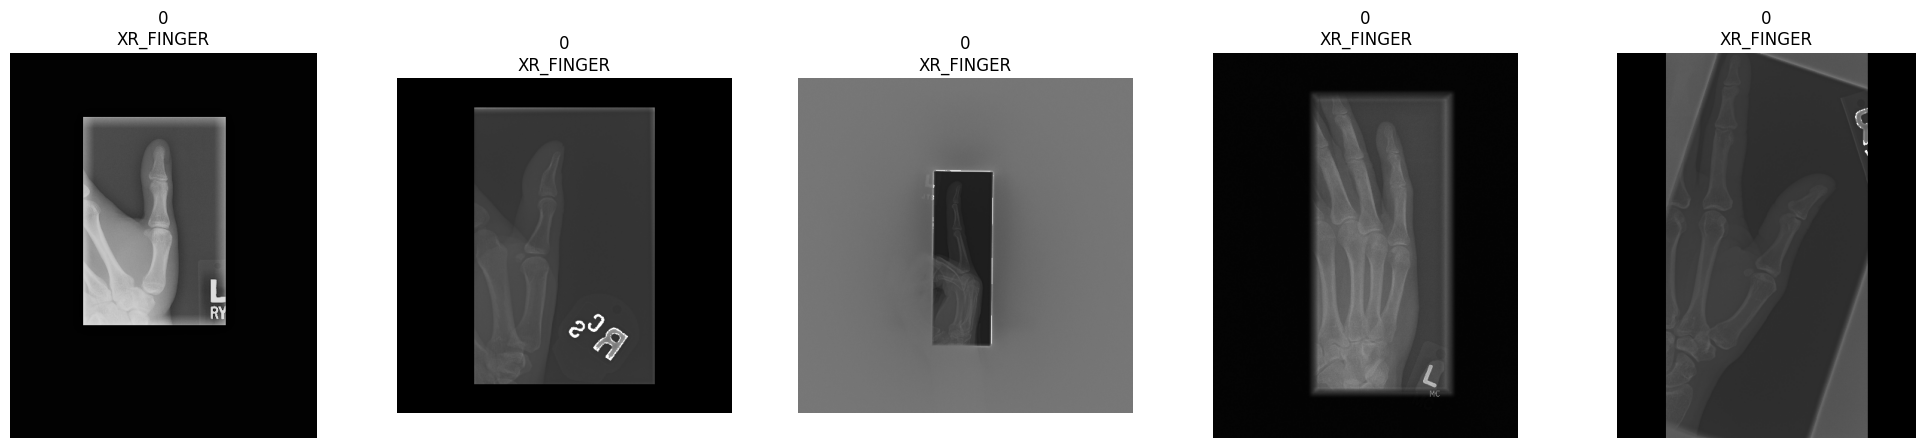

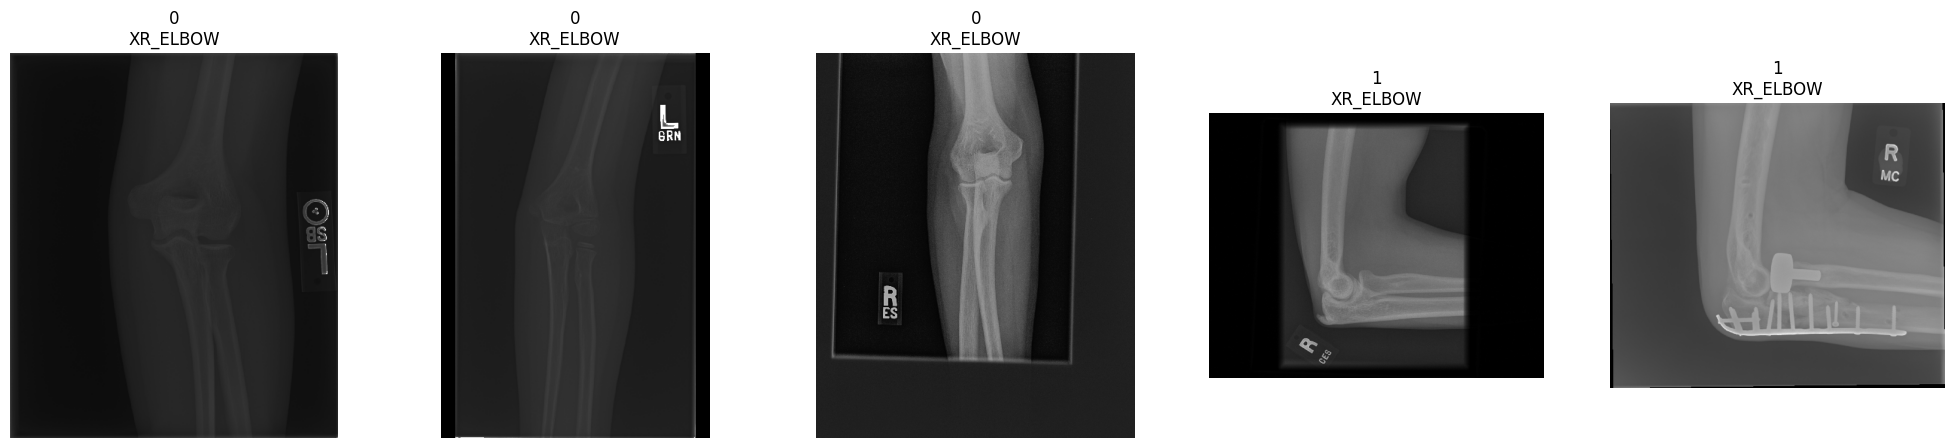

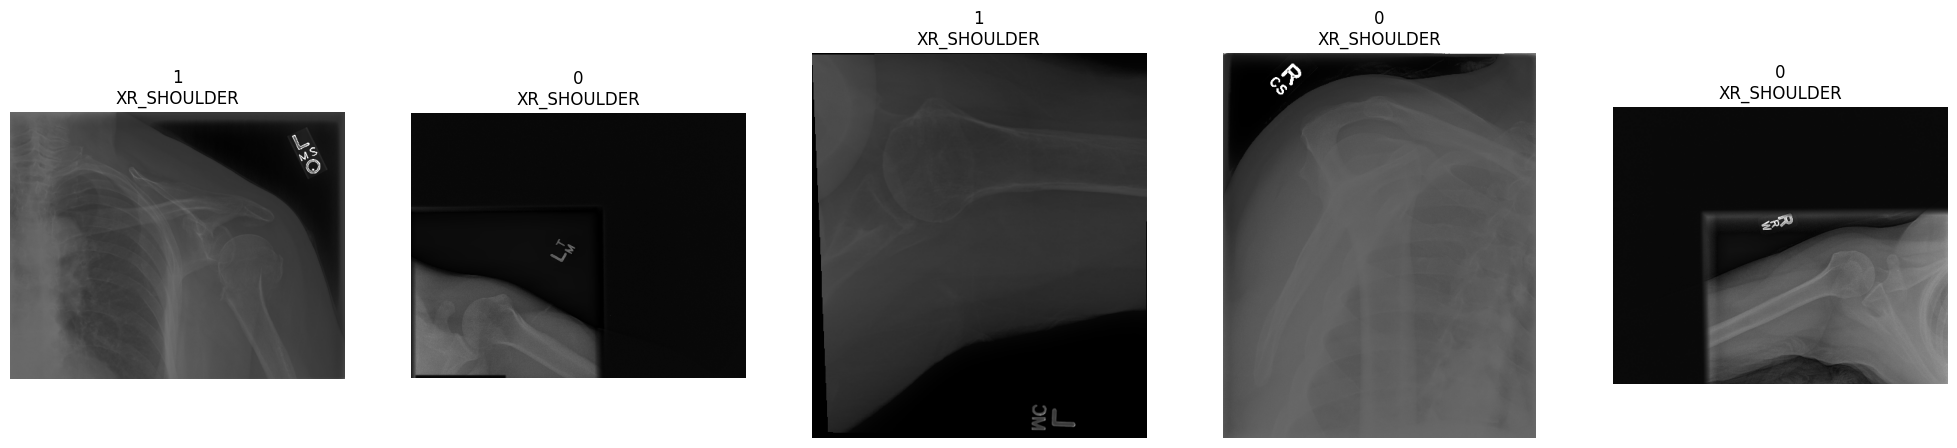

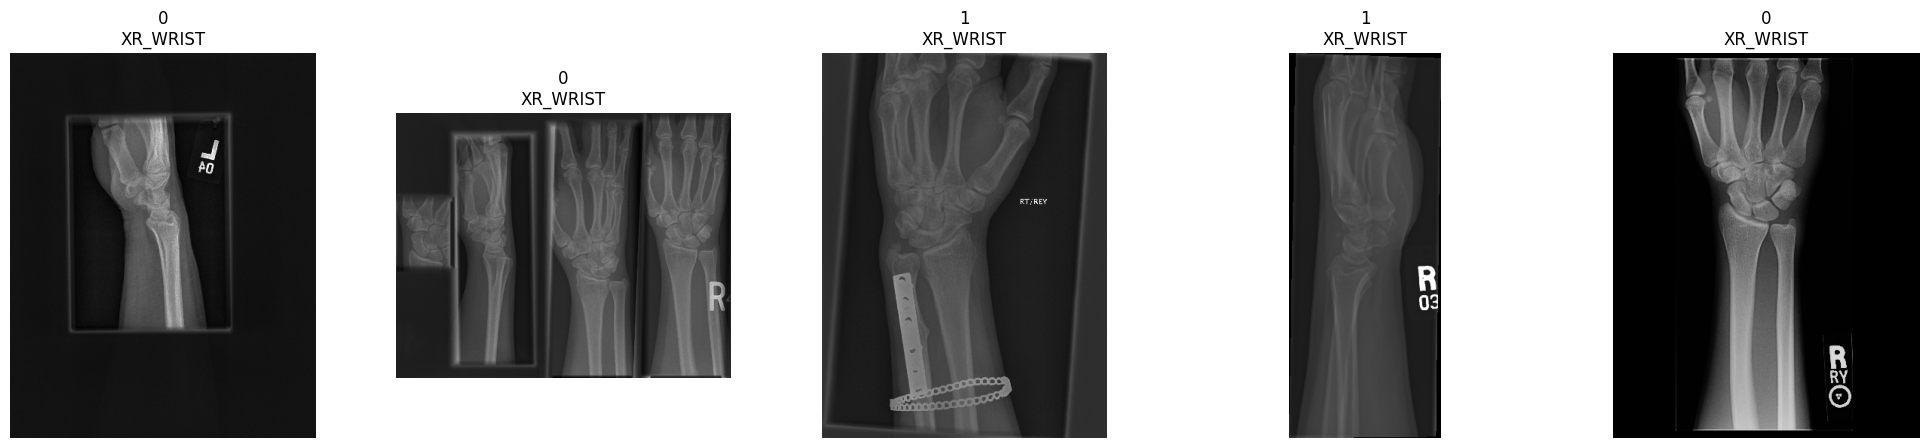

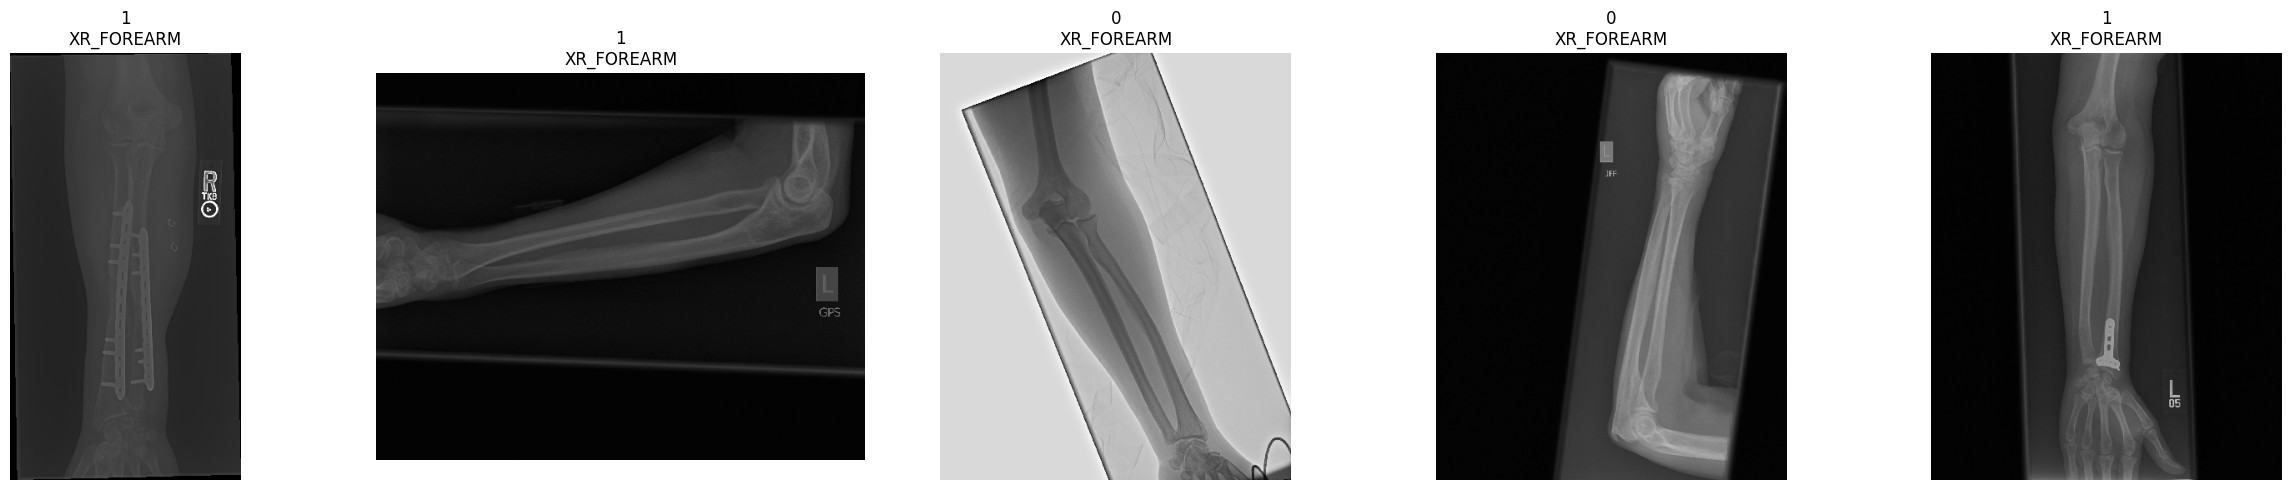

In [30]:
# Display sample of training images
for study_type in study_types:
    fig, axes = plt.subplots(1, 5, figsize=(25, 5))
    imgs = df_train[df_train['study_type'] == study_type].sample(n = 5)
    for i, (image, label) in enumerate(zip(imgs['img_path'], imgs['label'])):
        image = load_img(image)
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(str(label) + "\n" + study_type, fontsize=12)

plt.tight_layout()
plt.show()

In [31]:
# Convert labels to str
df_train['label'] = df_train['label'].replace({0: '0', 1: '1'})
df_valid['label'] = df_valid['label'].replace({0: '0', 1: '1'})
df_test['label'] = df_test['label'].replace({0: '0', 1: '1'})

In [32]:
# Data augmentation
datagen = ImageDataGenerator(rescale = 1./255)
train_generator = datagen.flow_from_dataframe(
    dataframe = df_train,
    directory = None,
    x_col = 'img_path',
    y_col = 'label',
    batch_size = 64,
    shuffle = True,
    class_mode = 'binary',
    target_size = (224, 224),
)

Found 33126 validated image filenames belonging to 2 classes.


In [33]:
valid_generator = datagen.flow_from_dataframe(
    dataframe = df_valid,
    directory = None,
    x_col = 'img_path',
    y_col = 'label',
    batch_size = 64,
    shuffle = True,
    class_mode = 'binary',
    target_size = (224, 224),
)

Found 3682 validated image filenames belonging to 2 classes.


In [34]:
test_generator = datagen.flow_from_dataframe(
    dataframe = df_test,
    directory = None,
    x_col = 'img_path',
    y_col = 'label',
    batch_size = 64,
    shuffle = False,
    class_mode = 'binary',
    target_size = (224, 224),
)

Found 3197 validated image filenames belonging to 2 classes.


# DenseNet
the following resource was utilized havily as a resource to implement transfer learning with DenseNet:

https://www.kaggle.com/code/cafelatte1/alien-and-predator-classification-beginner/notebook

In [35]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import tensorflow as tf
import keras
import random as rnd
import pathlib
import math
import re
import time

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential as sequential
from tensorflow.keras import applications as pretrained
from tensorflow.python.client import device_lib
from tensorflow.keras import losses
from tensorflow.keras import metrics
from keras.utils import plot_model

# --- Processor option ---
# GPU setup
try:
    gpu = tf.config.experimental.list_physical_devices('GPU')
    tf.config.experimental.set_memory_growth(gpu[0], True)
except:
    print("None of GPUs are detected")

2024-04-18 19:42:39.215766: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-18 19:42:39.310830: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-18 19:42:39.311141: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [36]:
# basic model parameters
cut_off = 0.5
epochs = 100

img_width = 224  # keep image sizes consistent with Michelle's code
img_height = 224
inputTensor = tf.keras.Input(shape=(img_width,img_height,3))


In [37]:
import tensorflow as tf
import tensorflow.keras.backend as K
from sklearn.metrics import cohen_kappa_score

# Create custom cohen kappa metric since not in keras
def cohen_kappa_metric(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float64)
    y_pred = tf.cast(tf.round(y_pred), dtype=tf.float64)
    kappa = tf.py_function(func=cohen_kappa, inp=[y_true, y_pred], Tout=tf.float64, name='cohen_kappa')
    kappa.set_shape(())
    return kappa

# Helper function to calculate Cohen's kappa from sklearn
def cohen_kappa(y_true, y_pred):
    kappa = cohen_kappa_score(y_true, y_pred)
    return kappa


metricsVec = [
    metrics.BinaryAccuracy(threshold=cut_off),
    metrics.Precision(thresholds=cut_off),
    metrics.Recall(thresholds=cut_off),
    metrics.AUC(),
    # cohen_kappa_metric,
]

# Creating pretrained DenseNet model
def CreatingTopLayers(featureTensor):
    topLayers = None
    topLayers = sequential([
                    layers.GlobalAveragePooling2D(),
                    layers.Dropout(0.2),
                    layers.Dense(units=1, activation="sigmoid")
    ], name="Top_Layers")
    return(topLayers)

def create_model():
    # Loading the base model
    model_base = sequential([
         # layers.experimental.preprocessing.Rescaling(input_shape=(img_height, img_width, 3), scale=1.0/255, name="Rescailing"),
         # data_augmentation,
         pretrained.DenseNet201(input_shape=(img_width, img_height, 3), weights="imagenet", include_top=False)], name="Base_DenseNet201")

    model_base.trainable = False
    model_base.summary()

    featureTensor = model_base(inputTensor)
    topLayers = CreatingTopLayers(featureTensor)

    modified_model = sequential([model_base, topLayers], name="DenseNet201")
    modified_model.summary()

    modified_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001*3),
        loss=losses.BinaryCrossentropy(from_logits=False),
        metrics=metricsVec)
    
    return modified_model
modified_model = create_model()

2024-04-18 19:42:39.323289: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-18 19:42:39.323498: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-18 19:42:39.323645: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "Base_DenseNet201"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet201 (Functional)        │ ?                      │    18,321,984 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,321,984 (69.89 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 18,321,984 (69.89 MB)

Model: "DenseNet201"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Base_DenseNet201 (Sequential)   │ (None, 7, 7, 1920)     │    18,321,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Top_Layers (Sequential)         │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,321,984 (69.89 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 18,321,984 (69.89 MB)

In [38]:
def SquareRootScheduler(epochCount, lr):
    return lr * pow(epochCount+1.0, -0.5)

tmpEpochs = list(range(50))
tmpLr = list(map(lambda x: SquareRootScheduler(x, tf.keras.optimizers.Adam().get_config()["learning_rate"]*3), tmpEpochs))

# plt.figure(figsize=(16, 9))
# plt.rc('font', size=12)
# plt.plot(tmpEpochs, tmpLr, label='Training Accuracy')
# plt.title("Learning Scheduler")
# plt.xlabel("Epochs")
# plt.ylabel("Learning rate")

cb_lrscheduler = tf.keras.callbacks.LearningRateScheduler(SquareRootScheduler)
cb_earlystopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=math.floor(epochs*0.1))

In [39]:
# code for saving model checkpoints
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "checkpoints/cp-{epoch:04d}.weights.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)

batch_size = 32

# Calculate the number of batches per epoch
import math
n_batches = len(train_generator) / batch_size
n_batches = math.ceil(n_batches)    # round up the number of batches to the nearest whole integer

# Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=30*n_batches)


In [45]:

tf.random.set_seed(2000)

model_DenseNet201 = create_model()
model_DenseNet201.save_weights(checkpoint_path.format(epoch=0))

import time
start_time = time.time()
history_DenseNet201 = None
history_DenseNet201 = model_DenseNet201.fit(
  train_generator,
  batch_size=None,
  validation_data=valid_generator,
  validation_batch_size=None,
  epochs=epochs,
  callbacks=[cb_lrscheduler, cp_callback, cb_earlystopping],
  verbose=1
)
print(f'Trained model in {time.time()-start_time}s')


# saving out the model
model_DenseNet201.save_weights('densenetmodel.weights.h5')

import json
# Get the dictionary containing each metric and the loss for each epoch
history_dict = history_DenseNet201.history
# Save it under the form of a json file
json.dump(history_dict, open('densenetmodel_history.json', 'w'))

Model: "Base_DenseNet201"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet201 (Functional)        │ ?                      │    18,321,984 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,321,984 (69.89 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 18,321,984 (69.89 MB)

Model: "DenseNet201"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Base_DenseNet201 (Sequential)   │ (None, 7, 7, 1920)     │    18,321,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Top_Layers (Sequential)         │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,321,984 (69.89 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 18,321,984 (69.89 MB)

Epoch 1/100
493/518 ━━━━━━━━━━━━━━━━━━━━ 4s 162ms/step - auc: 0.7061 - binary_accuracy: 0.6696 - loss: 0.6376 - precision: 0.6127 - recall: 0.4950
Epoch 1: saving model to checkpoints/cp-0001.weights.h5
518/518 ━━━━━━━━━━━━━━━━━━━━ 122s 200ms/step - auc: 0.7069 - binary_accuracy: 0.6702 - loss: 0.6358 - precision: 0.6138 - recall: 0.4955 - val_auc: 0.7813 - val_binary_accuracy: 0.6991 - val_loss: 0.5887 - val_precision: 0.8493 - val_recall: 0.3105 - learning_rate: 0.0030
Epoch 2/100
485/518 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step - auc: 0.7631 - binary_accuracy: 0.7168 - loss: 0.5637 - precision: 0.6880 - recall: 0.5429
Epoch 2: saving model to checkpoints/cp-0002.weights.h5
518/518 ━━━━━━━━━━━━━━━━━━━━ 85s 162ms/step - auc: 0.7628 - binary_accuracy: 0.7164 - loss: 0.5639 - precision: 0.6873 - recall: 0.5431 - val_auc: 0.7888 - val_binary_accuracy: 0.7363 - val_loss: 0.5406 - val_precision: 0.7460 - val_recall: 0.5269 - learning_rate: 0.0021
Epoch 3/100
477/518 ━━━━━━━━━━━━━━━━━━━━ 6s 148ms

Epoch 16/100
373/518 ━━━━━━━━━━━━━━━━━━━━ 21s 146ms/step - auc: 0.7737 - binary_accuracy: 0.7212 - loss: 0.5513 - precision: 0.7029 - recall: 0.5403
Epoch 16: saving model to checkpoints/cp-0016.weights.h5
518/518 ━━━━━━━━━━━━━━━━━━━━ 85s 163ms/step - auc: 0.7740 - binary_accuracy: 0.7222 - loss: 0.5510 - precision: 0.7039 - recall: 0.5428 - val_auc: 0.7955 - val_binary_accuracy: 0.7433 - val_loss: 0.5355 - val_precision: 0.7457 - val_recall: 0.5538 - learning_rate: 6.5586e-10
Epoch 17/100
365/518 ━━━━━━━━━━━━━━━━━━━━ 22s 148ms/step - auc: 0.7732 - binary_accuracy: 0.7245 - loss: 0.5530 - precision: 0.6991 - recall: 0.5481
Epoch 17: saving model to checkpoints/cp-0017.weights.h5
518/518 ━━━━━━━━━━━━━━━━━━━━ 87s 165ms/step - auc: 0.7752 - binary_accuracy: 0.7254 - loss: 0.5510 - precision: 0.7014 - recall: 0.5500 - val_auc: 0.7955 - val_binary_accuracy: 0.7433 - val_loss: 0.5355 - val_precision: 0.7457 - val_recall: 0.5538 - learning_rate: 1.5907e-10
Epoch 18/100
357/518 ━━━━━━━━━━━━━━━

In [46]:
test_generator.reset()
df_test['pred'] = model_DenseNet201.predict(test_generator).ravel()
df_test

50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 292ms/step


study_type    patient_id  \
0     XR_FOREARM  patient11463   
1     XR_FOREARM  patient11463   
2     XR_FOREARM  patient11449   
3     XR_FOREARM  patient11449   
4     XR_FOREARM  patient11408   
...          ...           ...   
3192    XR_ELBOW  patient11536   
3193    XR_ELBOW  patient11402   
3194    XR_ELBOW  patient11402   
3195    XR_ELBOW  patient11875   
3196    XR_ELBOW  patient11875   

                                               img_path label      pred  
0     MURA-v1.1/valid/XR_FOREARM/patient11463/study1...     0  0.488125  
1     MURA-v1.1/valid/XR_FOREARM/patient11463/study1...     0  0.647657  
2     MURA-v1.1/valid/XR_FOREARM/patient11449/study1...     0  0.198032  
3     MURA-v1.1/valid/XR_FOREARM/patient11449/study1...     0  0.294578  
4     MURA-v1.1/valid/XR_FOREARM/patient11408/study1...     1  0.208176  
...                                                 ...   ...       ...  
3192  MURA-v1.1/valid/XR_ELBOW/patient11536/study1_n...     0  0.339065  
3193  MURA-v1.1/valid/XR_ELBOW/patient11402/study1_n...     0  0.169698  
3194  MURA-v1.1/valid/XR_ELBOW/patient11402/study1_n...     0  0.119619  
3195  MURA-v1.1/valid/XR_ELBOW/patient11875/study1_n...     0  0.617962  
3196  MURA-v1.1/valid/XR_ELBOW/patient11875/study1_n...     0  0.320960  

[3197 rows x 5 columns]

In [47]:
df_test['pred'] = np.where(df_test.pred>0.5, 1, 0)
df_test

study_type    patient_id  \
0     XR_FOREARM  patient11463   
1     XR_FOREARM  patient11463   
2     XR_FOREARM  patient11449   
3     XR_FOREARM  patient11449   
4     XR_FOREARM  patient11408   
...          ...           ...   
3192    XR_ELBOW  patient11536   
3193    XR_ELBOW  patient11402   
3194    XR_ELBOW  patient11402   
3195    XR_ELBOW  patient11875   
3196    XR_ELBOW  patient11875   

                                               img_path label  pred  
0     MURA-v1.1/valid/XR_FOREARM/patient11463/study1...     0     0  
1     MURA-v1.1/valid/XR_FOREARM/patient11463/study1...     0     1  
2     MURA-v1.1/valid/XR_FOREARM/patient11449/study1...     0     0  
3     MURA-v1.1/valid/XR_FOREARM/patient11449/study1...     0     0  
4     MURA-v1.1/valid/XR_FOREARM/patient11408/study1...     1     0  
...                                                 ...   ...   ...  
3192  MURA-v1.1/valid/XR_ELBOW/patient11536/study1_n...     0     0  
3193  MURA-v1.1/valid/XR_ELBOW/patient11402/study1_n...     0     0  
3194  MURA-v1.1/valid/XR_ELBOW/patient11402/study1_n...     0     0  
3195  MURA-v1.1/valid/XR_ELBOW/patient11875/study1_n...     0     1  
3196  MURA-v1.1/valid/XR_ELBOW/patient11875/study1_n...     0     0  

[3197 rows x 5 columns]

In [48]:
df_test.to_csv('test_w_preds.csv')

[0.7433460354804993,
 0.6355572805645912,
 0.7954835891723633,
 0.5354515910148621,
 22]

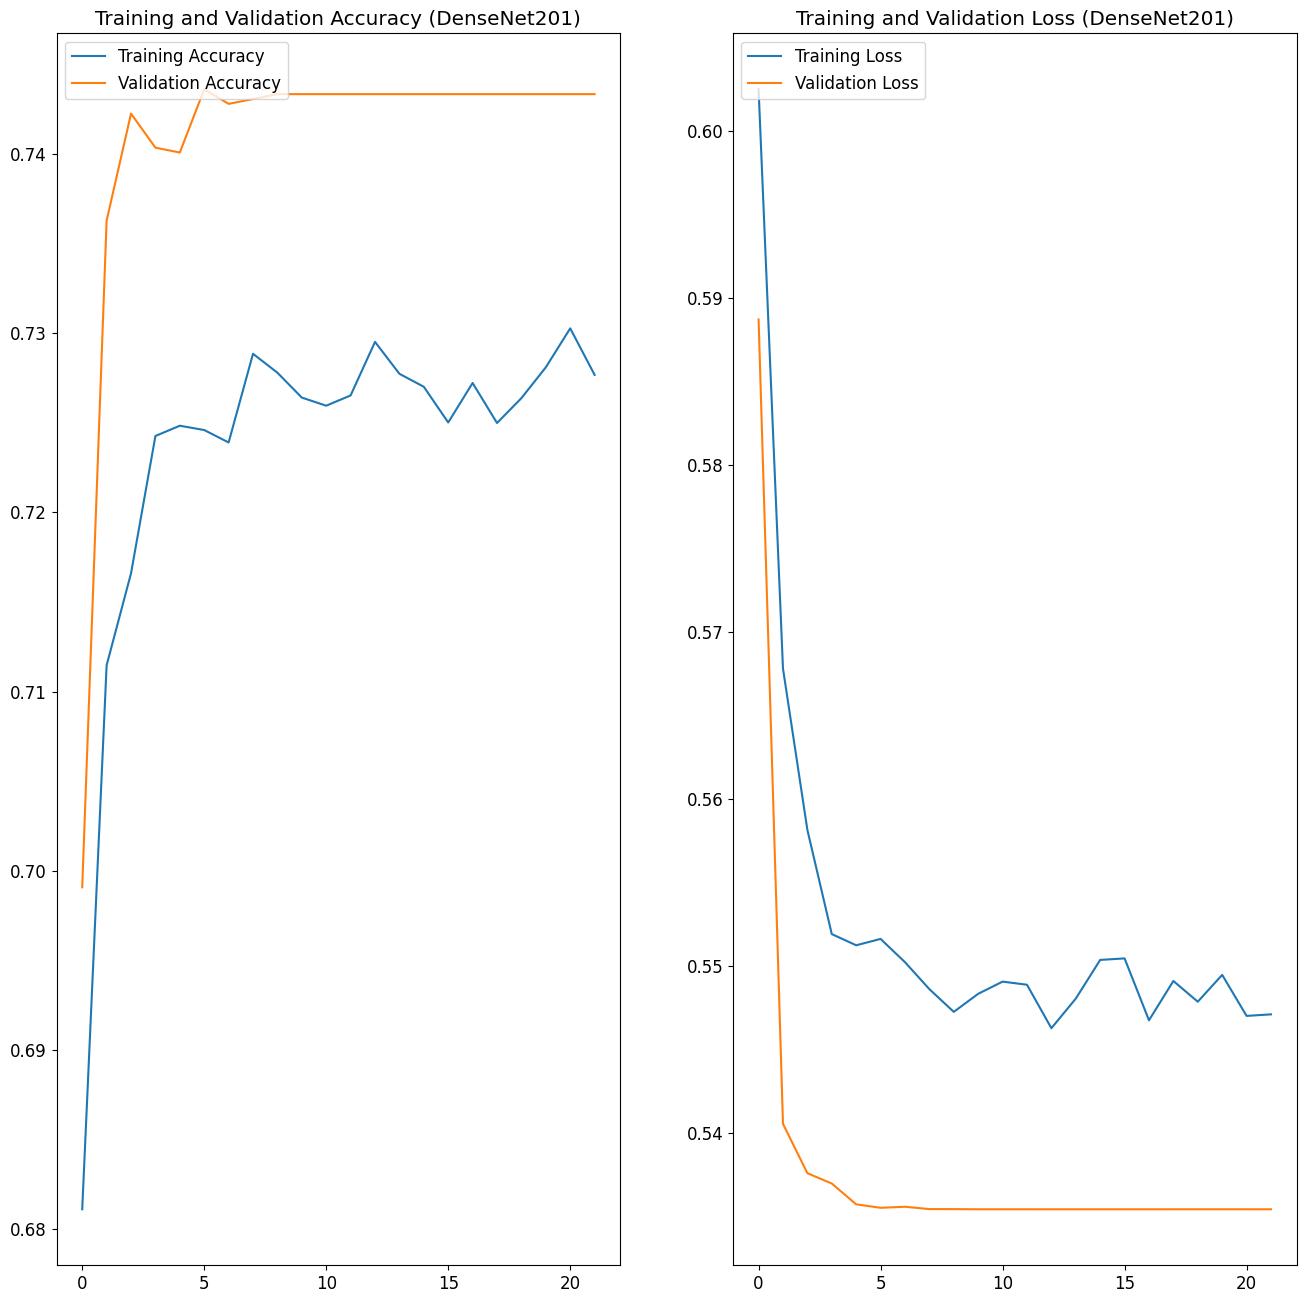

In [49]:
def PlottingResult(his, result, name):
    acc = his.history['binary_accuracy']
    val_acc = his.history['val_binary_accuracy']
    loss = his.history['loss']
    val_loss = his.history['val_loss']

    plt.figure(figsize=(16, 16))
    plt.rc('font', size=12)

    plt.subplot(1, 2, 1)
    plt.plot(range(len(acc)), acc, label='Training Accuracy')
    plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
    plt.legend(loc='upper left')
    title = 'Training and Validation Accuracy (' + his.model.name + ')'
    plt.title(title)
    
    plt.subplot(1, 2, 2)
    plt.plot(range(len(loss)), loss, label='Training Loss')
    plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
    plt.legend(loc='upper left')
    title = 'Training and Validation Loss (' + his.model.name + ')'
    plt.title(title)
    

    bestIdx = 0
    val_accuracy = 0
    val_precision = 0
    val_recall = 0
    val_auc = 0
    val_f1 = 0

    for i,j in his.history.items():
        if "val_loss" in i:
            bestIdx = np.argmin(j)
            val_loss = j[-1]

    for i,j in his.history.items():
        if "val_binary_accuracy" in i:
            val_accuracy = j[-1]
        elif "val_precision" in i:
            val_precision = j[-1]
        elif "val_recall" in i:
            val_recall = j[-1]
        elif "val_auc" in i:
            val_auc = j[-1]

    val_f1 = 2 * (val_precision * val_recall) / (val_precision + val_recall)

    return [val_accuracy, val_f1, val_auc, val_loss, len(his.epoch)]

result = pd.DataFrame({'Accuracy' : [None],
        'F1' : [None],
        'AUC' : [None],
        'Loss' : [None],
        'Epoch' : [None]                
})
result.index = ['DenseNet201']

result = PlottingResult(history_DenseNet201, result, 'DenseNet201')
result